# 基于CNN模型的物体识别

## 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2.回答以下理论题目?

### 2.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

convolutional laye : (100 - 5) +1  = 96   -->   96 * 96 * 50

hidden layer parameters : (96 * 96 + 1) * 50 = 460850

### 2.2. What are "local invariant" and "parameter sharing" ?

local invariant : 位置不变性，无论输入的图像中的元素 发生怎样的位置变化，不会影响最终特征数据的提取。
    
parameter sharing ： 参数共享，单个filter使用一个卷积核矩阵，可以减少参数，优化模型

### 2.3. Why we use batch normalization ?

可以使用更大的学习率，训练过程更加稳定，极大提高了训练速度。

可以将bias置为0，因为Batch Normalization的Standardization过程会移除直流分量，所以不再需要bias。

对权重初始化不再敏感，通常权重采样自0均值某方差的高斯分布，以往对高斯分布的方差设置十分重要，有了Batch Normalization后，对与同一个输出节点相连的权重进行放缩，其标准差σ \sigmaσ也会放缩同样的倍数，相除抵消。

对权重的尺度不再敏感，理由同上，尺度统一由γ \gammaγ参数控制，在训练中决定。

深层网络可以使用sigmoid和tanh了，理由同上，BN抑制了梯度消失。

Batch Normalization具有某种正则作用，不需要太依赖dropout，减少过拟合


### 2.4. What problem does dropout try to solve ?

dropout 可以防止过拟合

## 3. 实践题

### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [19]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

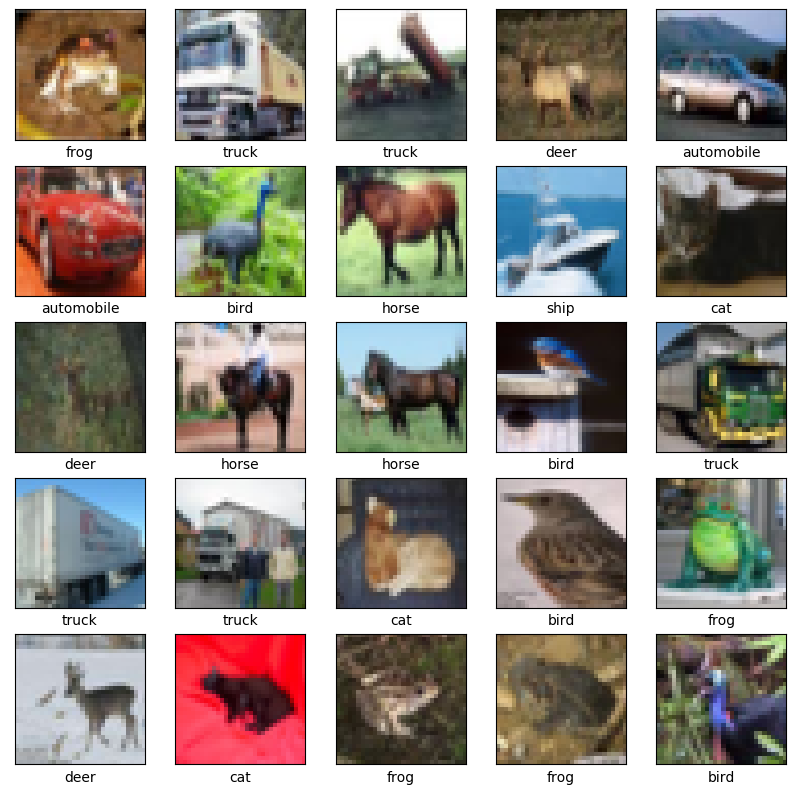

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10), dpi=100)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [21]:
# 创建卷积基础

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [22]:
# 展示模型的架构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 在顶部添加全连接层

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [24]:
# 展示模型的架构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [25]:
# 编译和训练模型

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.4803 - accuracy: 0.4599 - val_loss: 1.2202 - val_accuracy: 0.5564
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.1361 - accuracy: 0.5983 - val_loss: 1.0559 - val_accuracy: 0.6283
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9885 - accuracy: 0.6527 - val_loss: 0.9872 - val_accuracy: 0.6517
Epoch 4/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.8900 - accuracy: 0.6889 - val_loss: 0.9069 - val_accuracy: 0.6841
Epoch 5/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.8213 - accuracy: 0.7135 - val_loss: 0.9076 - val_accuracy: 0.6761
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.7638 - accuracy: 0.7327 - val_loss: 0.8592 - val_accuracy: 0.7044
Epoch 7/10
50000/50000 [==============================] 

10000/10000 - 2s - loss: 0.8504 - accuracy: 0.7224


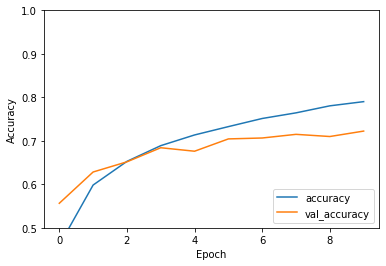

In [26]:
# 模型评估

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
# 准确率
test_acc

0.7224

###  Congratulations! You hanve finished the assignment 3.   